<h1 align="center">NYC Airbnb Price Prediction : Boosting Models</h1>
<h3 align="center">This Notebook contains the traning and evaluation of Boosting Models for the New York City Airbnb Price Prediction Dataset</h3> 
<h4 align="center"> Author: Amandine Allmang</h4> 

# Setup

In [ ]:
from utils import *
from evaluation_plots import *
from boosting import *

In [9]:
data = pd.read_csv('/Users/amandineallmang/Desktop/MSc-AI/Ensemble_Learning/project_data/AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<!-- # *IMPLEMENTATION 1*: Without normalized Price (y) -->

# Model Training and Evaluation

In [10]:
#using preprocessing helper function to create X and y 
X , y = preprocessing(df=data)

## 1. XGBoost Regressor

Using the GridSearchCV option of the *create_xgboost()* function on a first run, we found that the best parameters were the following:
- gamma = 0
- learning_rate - 0.1
- max_depth = 3
- n_estiamtors = 100

In [11]:
xgb_reg, y_test, y_pred_xgb = create_xgboost(X, y, params={'gamma': 0, 
                                                           'learning_rate': 0.1, 
                                                           'max_depth': 3, 
                                                           'n_estimators': 100})

Average run time for 5 folds on a XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...): 18.39989 +/- 5.077709
------------------------------------------------------------
Fit Time: 18.39989 +/- 5.077709
Score Time: 0.05289 +/- 0.023915
------------------------------------------------------------
Test Mean Absolute Err

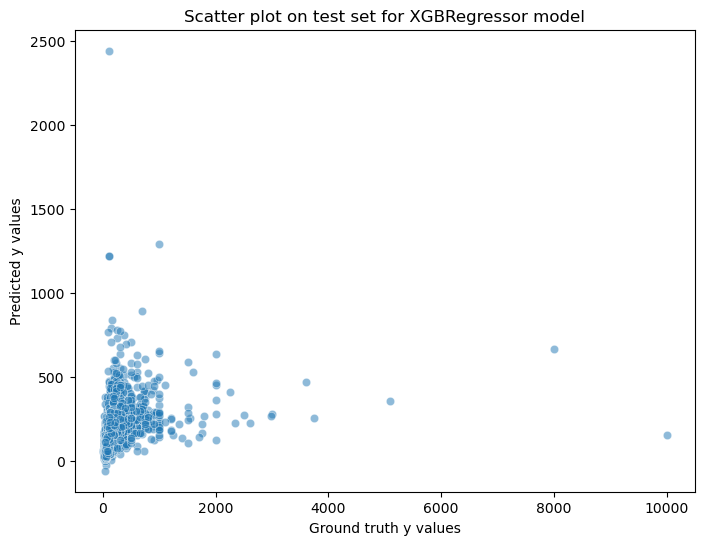

In [46]:
scatter_plot("XGBRegressor", y_test, y_pred_xgb)

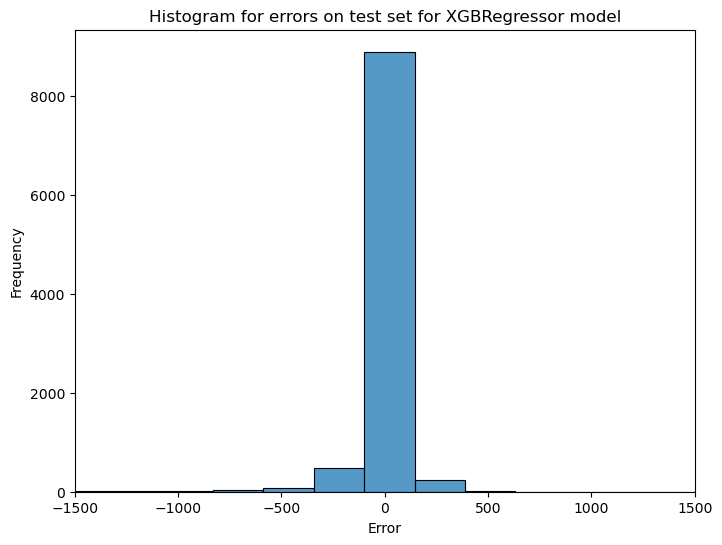

In [50]:
hist_plot("XGBRegressor", y_test, y_pred_xgb)

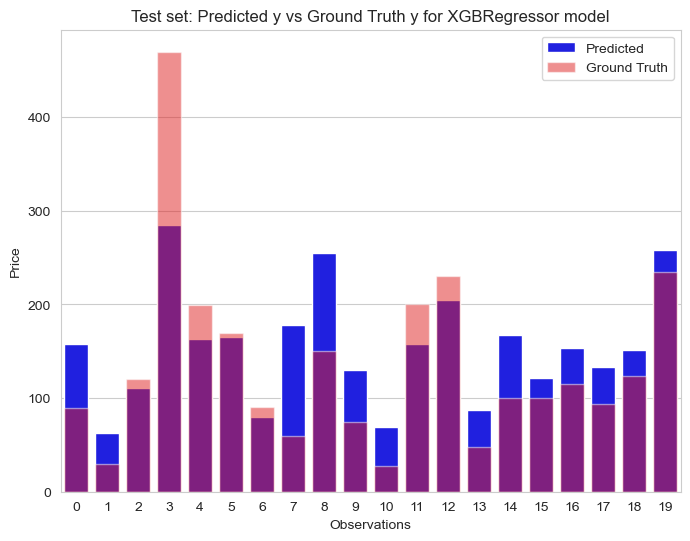

In [70]:
bar_plot_error("XGBRegressor", y_test, y_pred_xgb)

## 2. Adaboost Regressor

Using the GridSearchCV option of the create_adaboost() function on a first run, we found that the best parameters were:
- learning_rate = 0.01
- n_estiamtors = 50

In [15]:
ada_reg, y_test, y_pred_ada = create_adaboost(X, y, params = {'learning_rate': 0.01, 
                                                              'n_estimators': 50})

Average run time for 5 folds on a AdaBoostRegressor(learning_rate=0.01): 31.27243 +/- 6.070384
------------------------------------------------------------
Fit Time: 31.27243 +/- 6.070384
Score Time: 0.46007 +/- 0.204817
------------------------------------------------------------
Test Mean Absolute Error: 75.08817 +/- 1.719971
Train Mean Absolute Error: 74.66236 +/- 0.896724
------------------------------------------------------------
Test Root Mean Squared Error: 228.23179 +/- 25.287745
Train Root Mean Squared Error: 222.22673 +/- 4.848744
------------------------------------------------------------


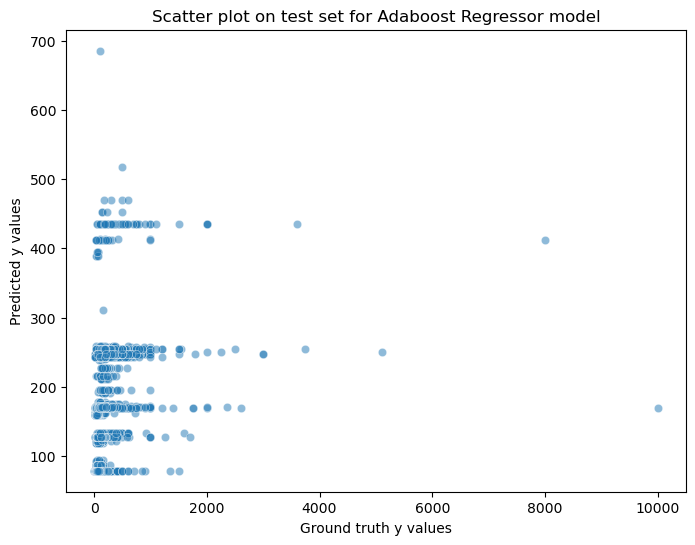

In [47]:
scatter_plot("Adaboost Regressor", y_test, y_pred_ada)

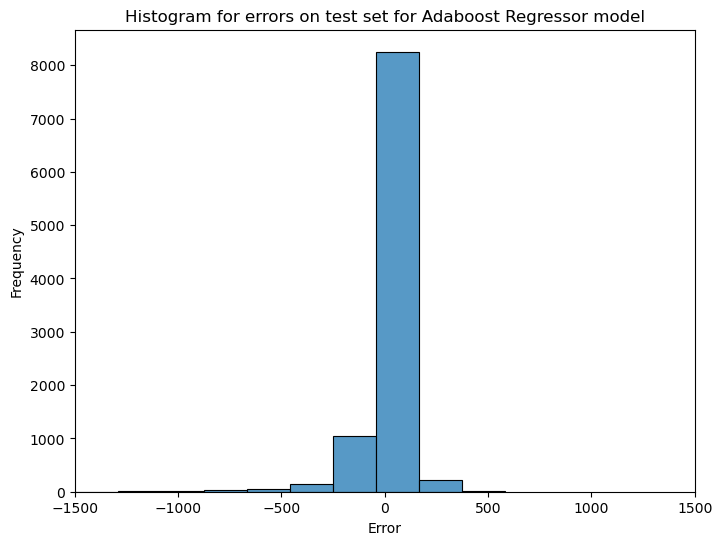

In [51]:
hist_plot("Adaboost Regressor", y_test, y_pred_ada)

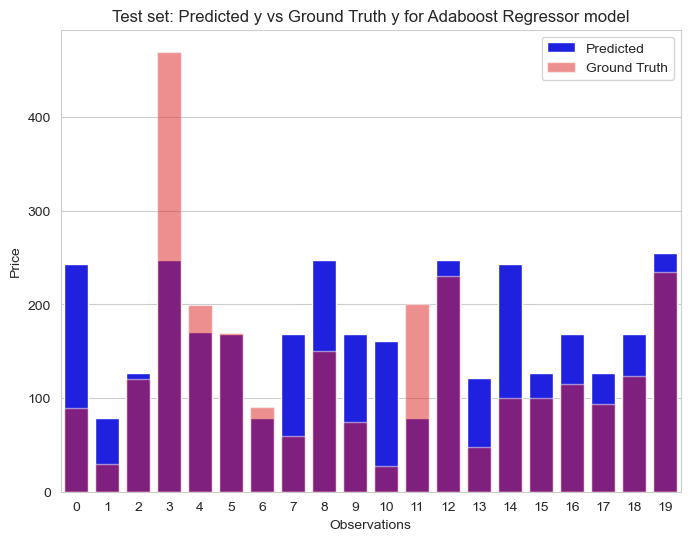

In [71]:
bar_plot_error("Adaboost Regressor", y_test, y_pred_ada)

## 3. Gradient Boosting

Using the GridSearchCV option of the create_gradboost() function, on a previous run, we found that the best parameters were:
- learning_rate = 0.1
- n_estimators = 50
- max_depth = 3
- min_samples_split = 2
- min_samples_leaf = 1

In [19]:
gradboost_reg, y_test, y_pred_grad = create_gradboost(X, y, params = {'learning_rate': 0.1,
                                                                      'n_estimators': 50,
                                                                      'max_depth': 3,
                                                                      'min_samples_split': 2, 
                                                                      'min_samples_leaf': 1})

Average run time for 5 folds on a GradientBoostingRegressor(n_estimators=50): 16.83079 +/- 2.801426
------------------------------------------------------------
Fit Time: 16.83079 +/- 2.801426
Score Time: 0.02209 +/- 0.003630
------------------------------------------------------------
Test Mean Absolute Error: 67.59220 +/- 1.416614
Train Mean Absolute Error: 66.44910 +/- 0.685428
------------------------------------------------------------
Test Root Mean Squared Error: 223.16274 +/- 23.346049
Train Root Mean Squared Error: 209.87778 +/- 3.701452
------------------------------------------------------------


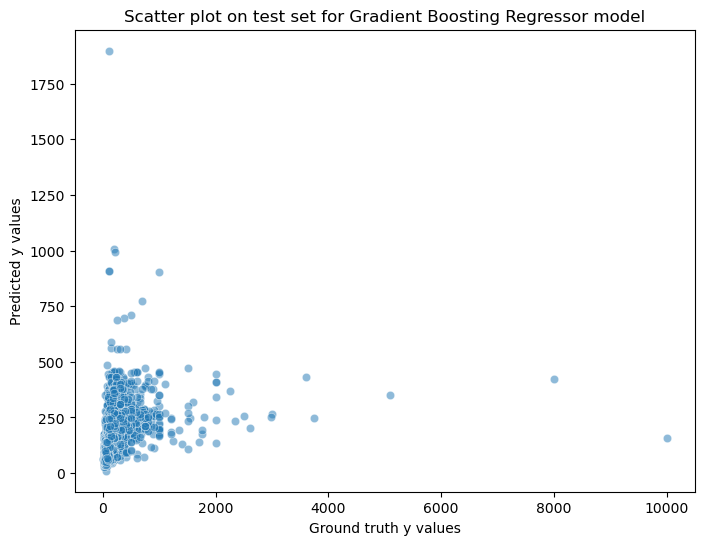

In [48]:
scatter_plot("Gradient Boosting Regressor", y_test, y_pred_grad)

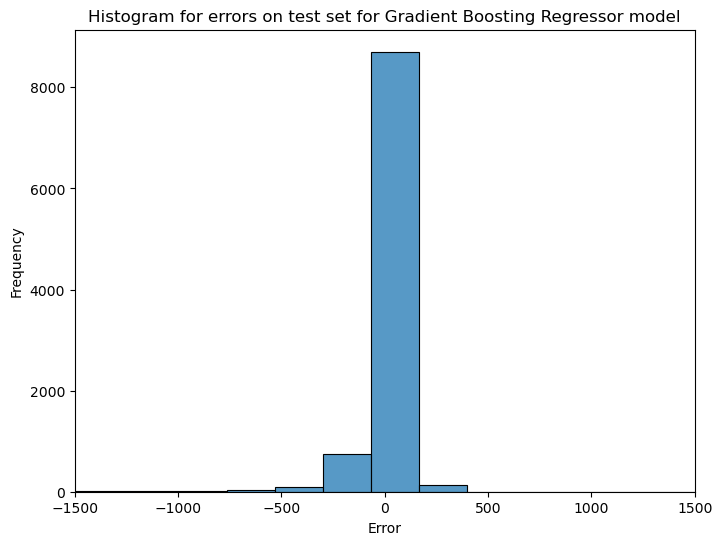

In [52]:
hist_plot("Gradient Boosting Regressor", y_test, y_pred_grad)

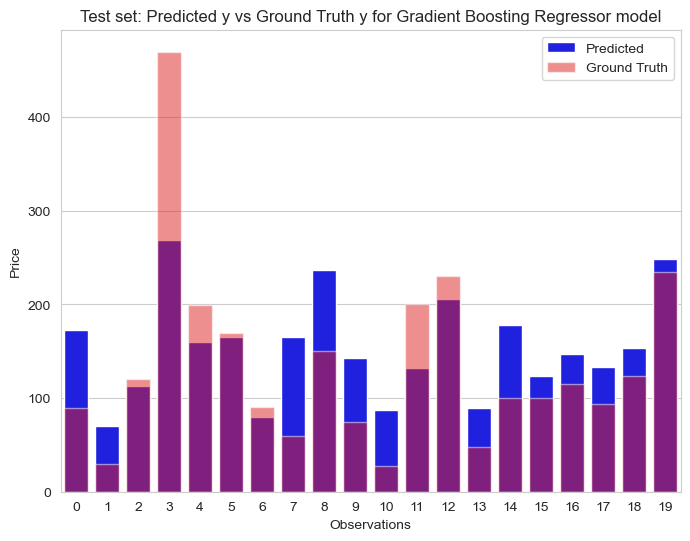

In [72]:
bar_plot_error("Gradient Boosting Regressor", y_test, y_pred_grad)